In [1]:
#importando as libs necessárias
import json
import requests

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#acessando a API
request = requests.get('https://api.covid19api.com/country/brazil')
request_text = request.text

In [5]:
#Formato é um texto na sintaxe do json
request_text

'[{"Country":"Brazil","CountryCode":"BR","Province":"","City":"","CityCode":"","Lat":"-14.24","Lon":"-51.93","Confirmed":0,"Deaths":0,"Recovered":0,"Active":0,"Date":"2020-01-22T00:00:00Z"},{"Country":"Brazil","CountryCode":"BR","Province":"","City":"","CityCode":"","Lat":"-14.24","Lon":"-51.93","Confirmed":0,"Deaths":0,"Recovered":0,"Active":0,"Date":"2020-01-23T00:00:00Z"},{"Country":"Brazil","CountryCode":"BR","Province":"","City":"","CityCode":"","Lat":"-14.24","Lon":"-51.93","Confirmed":0,"Deaths":0,"Recovered":0,"Active":0,"Date":"2020-01-24T00:00:00Z"},{"Country":"Brazil","CountryCode":"BR","Province":"","City":"","CityCode":"","Lat":"-14.24","Lon":"-51.93","Confirmed":0,"Deaths":0,"Recovered":0,"Active":0,"Date":"2020-01-25T00:00:00Z"},{"Country":"Brazil","CountryCode":"BR","Province":"","City":"","CityCode":"","Lat":"-14.24","Lon":"-51.93","Confirmed":0,"Deaths":0,"Recovered":0,"Active":0,"Date":"2020-01-26T00:00:00Z"},{"Country":"Brazil","CountryCode":"BR","Province":"","City

In [6]:
#convertendo em Json
dados = json.loads(request_text)

In [7]:
dados

[{'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-22T00:00:00Z'},
 {'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-23T00:00:00Z'},
 {'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-24T00:00:00Z'},
 {'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': '',
  'City': '',
  'CityCode': '',
  'Lat': '-14.24',
  'Lon': '-51.93',
  'Confirmed': 0,
  'Deaths': 0,
  'Recovered': 0,
  'Active': 0,
  'Date': '2020-01-25T00:00:00Z'},
 {'Country': 'Brazil',
  'CountryCode': 'BR',
  'Province': 

In [8]:
df = pd.DataFrame(dados) #coverte o json em data frame

#Checando o DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      177 non-null    object
 1   CountryCode  177 non-null    object
 2   Province     177 non-null    object
 3   City         177 non-null    object
 4   CityCode     177 non-null    object
 5   Lat          177 non-null    object
 6   Lon          177 non-null    object
 7   Confirmed    177 non-null    int64 
 8   Deaths       177 non-null    int64 
 9   Recovered    177 non-null    int64 
 10  Active       177 non-null    int64 
 11  Date         177 non-null    object
dtypes: int64(4), object(8)
memory usage: 16.7+ KB


In [10]:
df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-22T00:00:00Z
1,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-23T00:00:00Z
2,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-24T00:00:00Z
3,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-25T00:00:00Z
4,Brazil,BR,,,,-14.24,-51.93,0,0,0,0,2020-01-26T00:00:00Z


In [28]:
#Criando a coluna novas mortes, que é a diferença entre os mortos do dia anterior
#Criando a coluna novos infectados.

In [11]:
df['Novas Mortes'] = df['Deaths'].sub(df['Deaths'].shift())
df['Novos Infectados'] = df['Confirmed'].sub(df['Confirmed'].shift())

In [12]:
df[['Deaths','Novas Mortes','Confirmed','Novos Infectados','Date']].tail()

,Deaths,Novas Mortes,Confirmed,Novos Infectados,Date
172,72100,631.0,1864681,24831.0,2020-07-12T00:00:00Z
173,72833,733.0,1884967,20286.0,2020-07-13T00:00:00Z
174,74133,1300.0,1926824,41857.0,2020-07-14T00:00:00Z
175,75366,1233.0,1966748,39924.0,2020-07-15T00:00:00Z
176,76688,1322.0,2012151,45403.0,2020-07-16T00:00:00Z


In [13]:
#Convertendo a coluna data em DataTime
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Country           177 non-null    object             
 1   CountryCode       177 non-null    object             
 2   Province          177 non-null    object             
 3   City              177 non-null    object             
 4   CityCode          177 non-null    object             
 5   Lat               177 non-null    object             
 6   Lon               177 non-null    object             
 7   Confirmed         177 non-null    int64              
 8   Deaths            177 non-null    int64              
 9   Recovered         177 non-null    int64              
 10  Active            177 non-null    int64              
 11  Date              177 non-null    datetime64[ns, UTC]
 12  Novas Mortes      176 non-null    float64            
 13  Novos

In [ ]:
#Vamos ao gráfico de novos infectados nos ultimos 15 dias.

Text(0.5, 1.0, 'Novos Casos de Corona Vírus')

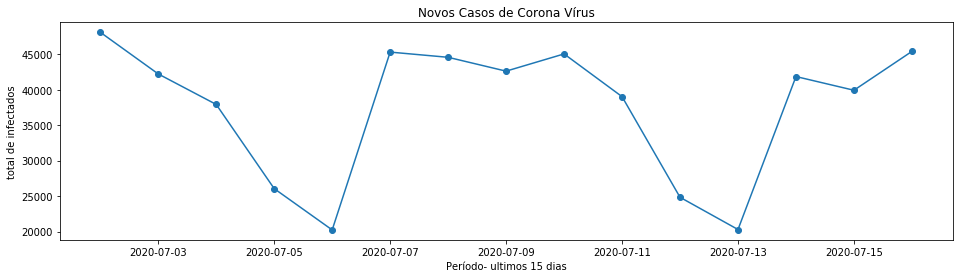

In [15]:
plt.figure(figsize=(16,4))
plt.plot(df.set_index('Date')['Novos Infectados'].iloc[-15:], lw=1.5, marker='o') #plt.plot(x,y)
plt.xlabel('Período- ultimos 15 dias')
plt.ylabel('total de infectados')
plt.title('Novos Casos de Corona Vírus')

In [16]:
#Gráfico das novas mortes nos ultimos 15 dias
#agora com o recurso do cufflink
import cufflinks as cf
cf.go_offline()

In [17]:
#esse gráfico está conectado, não funciona offline. Tem o recurso do tooltip ao passar o mouse sobre os pontos
fig = df.set_index('Date')['Novas Mortes'].iloc[-15:].iplot(mode='lines+markers',name='Teste')


In [18]:
#Record de novos infectados e mortes
Index_max_infec = df['Novos Infectados'].argmax() #retorna o índice do dia com mais infectados
Index_max_mortes = df['Novas Mortes'].argmax() #retorna o índice do dia com mais mortes

In [19]:
#Record de novos casos
df.iloc[Index_max_infec][['Date','Novos Infectados']]

Date                2020-06-19 00:00:00+00:00
Novos Infectados                        54771
Name: 149, dtype: object

In [20]:
#Record de mortes em um dia
df.iloc[Index_max_mortes][['Date','Novas Mortes']]

Date            2020-06-04 00:00:00+00:00
Novas Mortes                         1473
Name: 134, dtype: object

In [21]:
#top 5 mais mortes
df.sort_values(by='Novas Mortes', ascending=False).head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Novas Mortes,Novos Infectados
134,Brazil,BR,,,,-14.24,-51.93,614941,34021,254963,325957,2020-06-04 00:00:00+00:00,1473.0,30925.0
153,Brazil,BR,,,,-14.24,-51.93,1145906,52645,627963,465298,2020-06-23 00:00:00+00:00,1374.0,39436.0
133,Brazil,BR,,,,-14.24,-51.93,584016,32548,238617,312851,2020-06-03 00:00:00+00:00,1349.0,28633.0
176,Brazil,BR,,,,-14.24,-51.93,2012151,76688,1397531,537932,2020-07-16 00:00:00+00:00,1322.0,45403.0
174,Brazil,BR,,,,-14.24,-51.93,1926824,74133,1323425,529266,2020-07-14 00:00:00+00:00,1300.0,41857.0


In [22]:
#top 5 novos infectados
df.sort_values(by='Novos Infectados', ascending=False).head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Novas Mortes,Novos Infectados
149,Brazil,BR,,,,-14.24,-51.93,1032913,48954,551631,432328,2020-06-19 00:00:00+00:00,1206.0,54771.0
162,Brazil,BR,,,,-14.24,-51.93,1496858,61884,957692,477282,2020-07-02 00:00:00+00:00,1252.0,48105.0
156,Brazil,BR,,,,-14.24,-51.93,1274974,55961,702399,516614,2020-06-26 00:00:00+00:00,990.0,46860.0
161,Brazil,BR,,,,-14.24,-51.93,1448753,60632,817642,570479,2020-07-01 00:00:00+00:00,1038.0,46712.0
176,Brazil,BR,,,,-14.24,-51.93,2012151,76688,1397531,537932,2020-07-16 00:00:00+00:00,1322.0,45403.0


In [23]:
df.tail()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,Novas Mortes,Novos Infectados
172,Brazil,BR,,,,-14.24,-51.93,1864681,72100,1264843,527738,2020-07-12 00:00:00+00:00,631.0,24831.0
173,Brazil,BR,,,,-14.24,-51.93,1884967,72833,1291251,520883,2020-07-13 00:00:00+00:00,733.0,20286.0
174,Brazil,BR,,,,-14.24,-51.93,1926824,74133,1323425,529266,2020-07-14 00:00:00+00:00,1300.0,41857.0
175,Brazil,BR,,,,-14.24,-51.93,1966748,75366,1350098,541284,2020-07-15 00:00:00+00:00,1233.0,39924.0
176,Brazil,BR,,,,-14.24,-51.93,2012151,76688,1397531,537932,2020-07-16 00:00:00+00:00,1322.0,45403.0


In [24]:
#média de novos infectados nos ultimos 15 dias..média movel
df['Novos Infectados'].rolling(window=15).mean().iloc[-15:]

162    36098.733333
163    37395.933333
164    36272.733333
165    35698.400000
166    35996.200000
167    37474.600000
168    37816.933333
169    37809.866667
170    38180.866667
171    37658.400000
172    36734.266667
173    36054.933333
174    37241.933333
175    37647.133333
176    37559.866667
Name: Novos Infectados, dtype: float64

In [25]:
#média de novas mortes nos ultimos 15 dias
df['Novas Mortes'].rolling(window=15).mean().iloc[-15:]

162    1024.933333
163    1028.400000
164    1020.733333
165     992.733333
166     993.066667
167    1031.333333
168    1021.266667
169    1023.600000
170    1028.466667
171    1033.866667
172    1002.000000
173    1014.066667
174    1054.600000
175    1051.466667
176    1070.400000
Name: Novas Mortes, dtype: float64

In [26]:
#media móvel de mortes
df['Novas Mortes'].rolling(window=15).mean().iloc[-15:].mean()

1026.0622222222223

In [27]:
#media móvel de novos infectados
df['Novos Infectados'].rolling(window=15).mean().iloc[-15:].mean()

37042.72000000001